In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../data/raw/ml-100k/u.data", sep = "\t", names = ["user_id", "item_id", "rating", "timestamp"])
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
genres = pd.read_csv("../data/raw/ml-100k/u.genre", sep = "|", names=["genre", "id"])
genres

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [6]:
# Information about the items (movies). This is a tab separated list of movie id, movie title, release date, video release date, 
# IMDB URL, and genres. The last 19 fields are genres and contain binary values.
#  Movies can be of several genres at once. The movie ids are the ones used in u.data
genres_list = genres['genre'].to_list()
cols = ["id", "title", "release_date", "video_release_date", "imdb_url"]
cols = cols + genres_list
cols

['id',
 'title',
 'release_date',
 'video_release_date',
 'imdb_url',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [7]:
items = pd.read_csv("../data/raw/ml-100k/u.item", encoding = "ISO-8859-1", sep = "|", names = cols)
items.head()

,id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#user id, age, gender, occupation, zip code.
user = pd.read_csv("../data/raw/ml-100k/u.user", sep = "|", names = ["user_id", "age", "gender", "occupation", "zip_code"])
user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [9]:
#   List of plots:
# 1) Number of films for each genre
# 2) Number of users for each occupation
# 4) Age distribution among users
# 5) Number of films reviewed among users
# 6) Male to Female number
# 7) Avg. ratings of films

Text(0.5, 0.98, 'Genre Distribution')

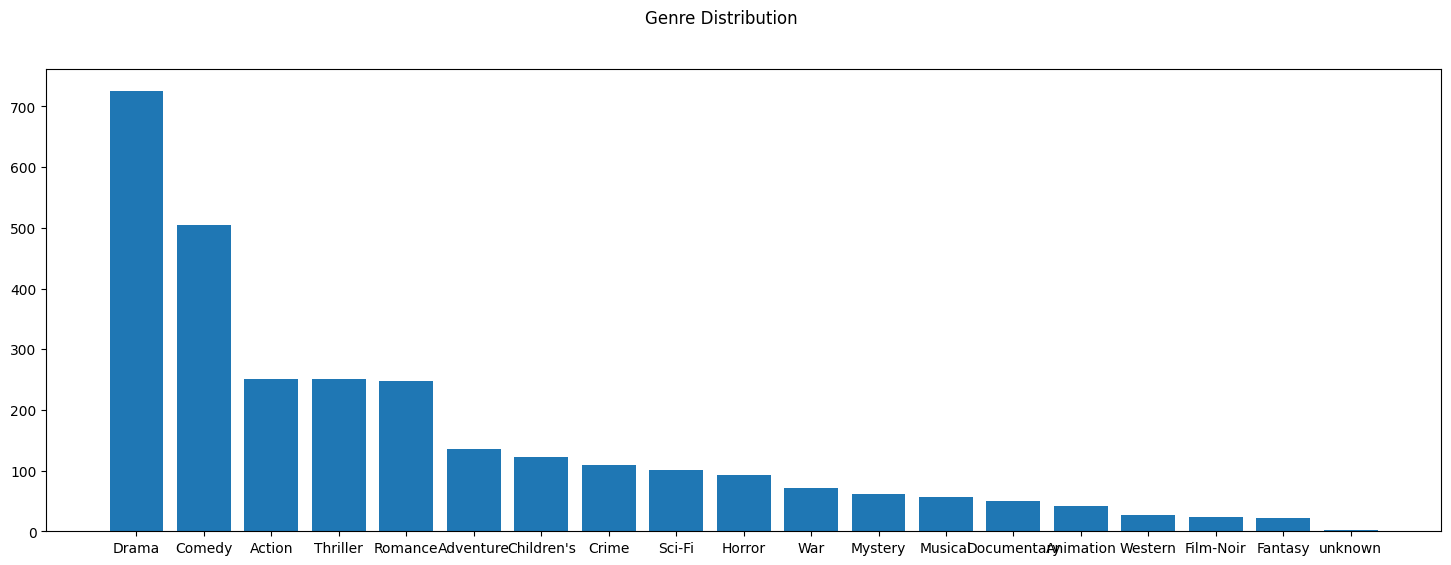

In [10]:
# Number of films for each genre
genres_distr = items.iloc[:, 5:].sum().to_dict()
genres_distr = dict(sorted(genres_distr.items(), key=lambda item: item[1], reverse=True))

names = list(genres_distr.keys())
values = list(genres_distr.values())

fig, axs = plt.subplots(1, 1, figsize=(18, 6))
axs.bar(names, values)
fig.suptitle('Genre Distribution')

Text(0.5, 0.98, 'Occupation Distribution')

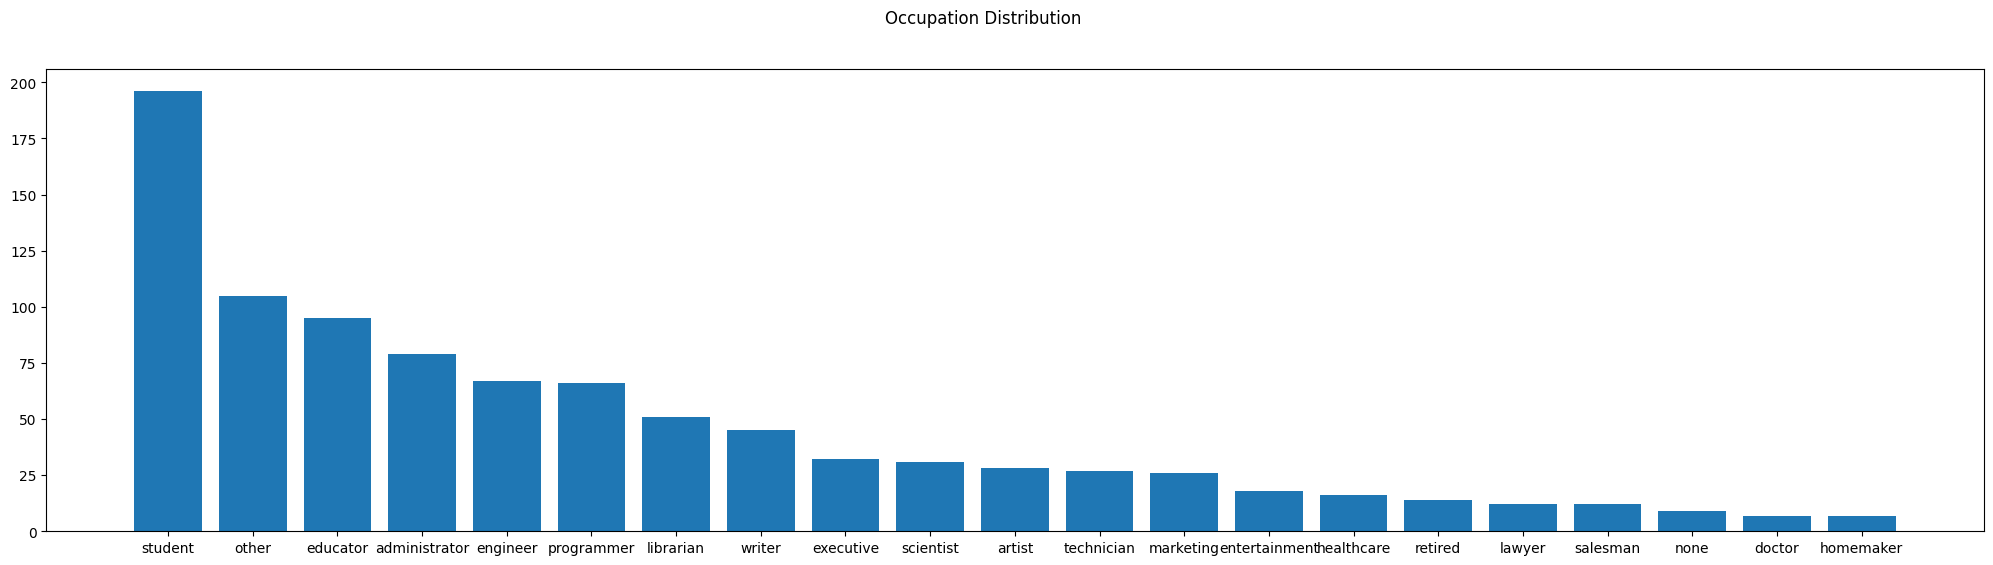

In [11]:
# Number of users for each occupation
occupation_distr = pd.get_dummies(user['occupation']).sum().to_dict()
occupation_distr = dict(sorted(occupation_distr.items(), key=lambda item: item[1], reverse=True))

names = list(occupation_distr.keys())
values = list(occupation_distr.values())

fig, axs = plt.subplots(1, 1, figsize=(25, 6))
axs.bar(names, values)
fig.suptitle('Occupation Distribution')

Text(0.5, 0, 'Age')

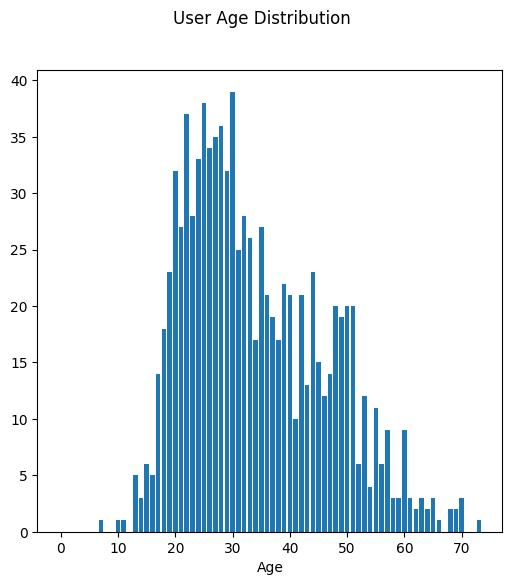

In [12]:
age_distr = dict(enumerate(np.bincount(user['age'].to_list())))

names = list(age_distr.keys())
values = list(age_distr.values())

fig, axs = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
axs.bar(names, values)
fig.suptitle('User Age Distribution')
plt.xlabel("Age")

Mean number of reviews: 106.04453870625663
Median number of reviews: 65


Text(0.5, 0, 'user_id')

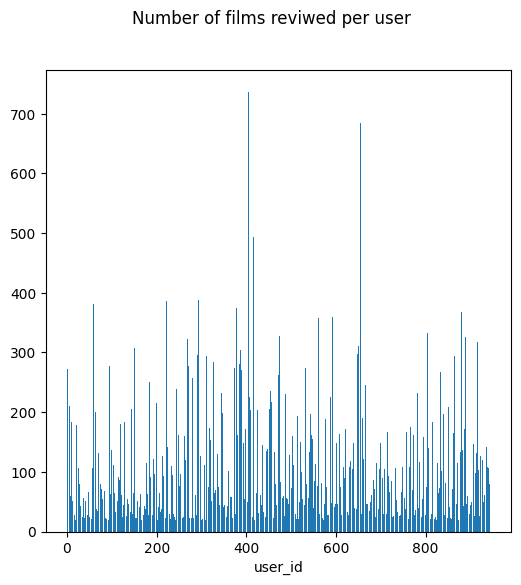

In [13]:
num_of_films = data['user_id'].value_counts().to_dict()

names = list(num_of_films.keys())
values = list(num_of_films.values())

mean = sum(values) / len(values) 
median = sorted(values)[int(len(values) / 2)]
print("Mean number of reviews:", mean)
print("Median number of reviews:", median)

fig, axs = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
axs.bar(names, values)
fig.suptitle('Number of films reviwed per user')
plt.xlabel("user_id")

3.52986


Text(0.5, 0, 'Rating')

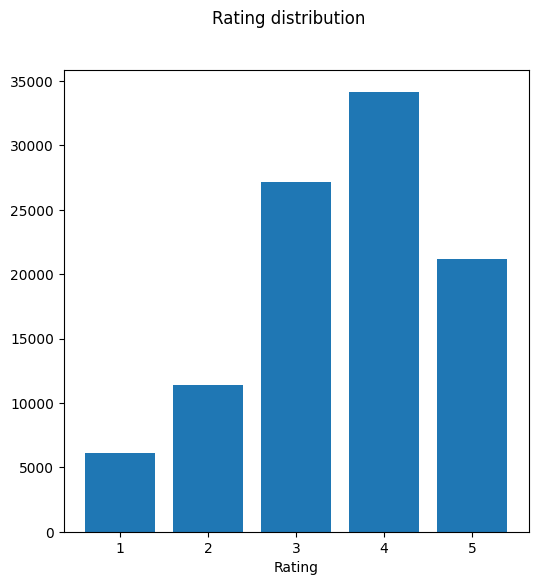

In [14]:
# Average rating
mean_rating = sum(data['rating'])/len(data)
print(mean_rating)
ratings = dict(pd.value_counts(data['rating']))

names = list(ratings.keys())
values = list(ratings.values())

fig, axs = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
axs.bar(names, values)
fig.suptitle('Rating distribution')
plt.xlabel("Rating")